In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from control import dlqr

# Proble data

In [2]:
# System description
# x+ = Ax + Bu
# y = Cx

A = np.array([[4/3, 2/3], [-2, 0]])
# A = np.array([[4/3, -2/3], [1, 0]])
B = np.array([[1],[0]])
C = np.array([[-2/3, 1]])

# Cost weights
# J = x'Qx + u'Ru
Q = np.matmul(C.T,C) + 0.001*np.identity(2)
R = 1e3

# Description of the terminal set
# Gx <= g
G = np.array([
    [ 0.     ,  1.     ],
    [ 0.     , -1.     ],
    [-1.     ,  0.     ],
    [ 1.     ,  0.     ],
    [-0.93683, -0.34979],
    [ 0.93683,  0.34979],
    [-0.55349, -0.83285],
    [ 0.96483,  0.26288],
    [ 0.9835 , -0.18089]])

g = np.array([[2.]   , [3.]   , [1.]   , [1.5]  , [0.943], [1.415], [2.261], [1.436], [1.993]])

# Solve LQR

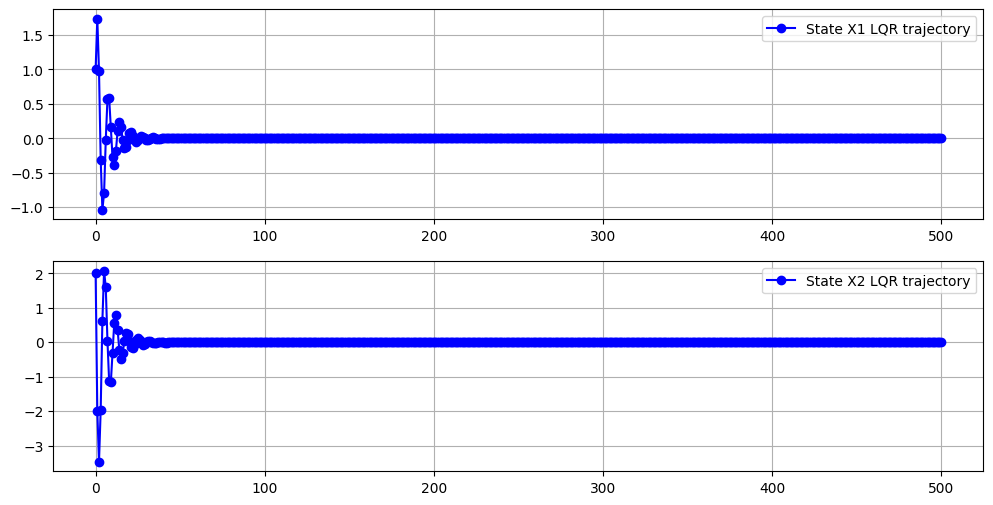

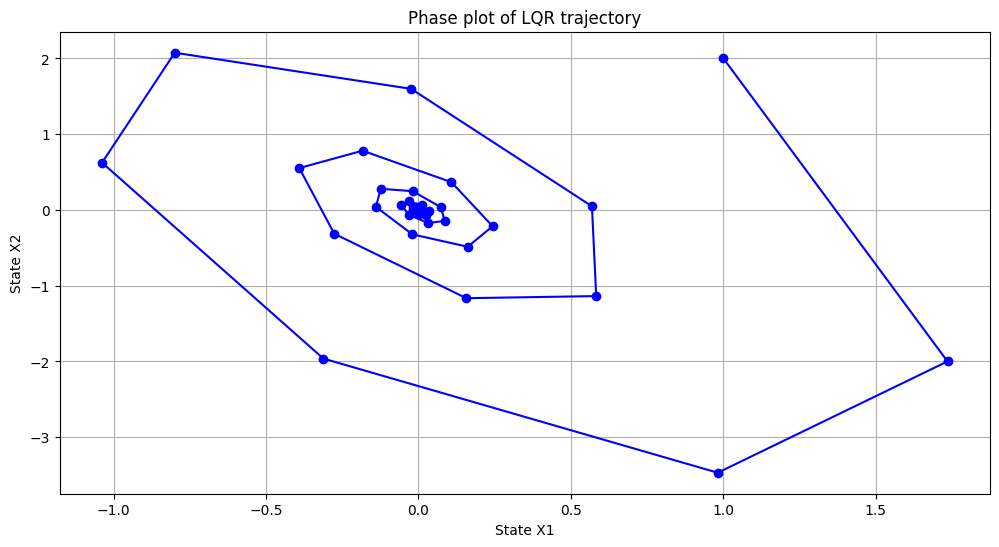

[[797.74018697 226.0898348 ]
 [226.0898348  198.22148646]]


In [11]:
K,P,d = dlqr(A,B,Q,R)
X0 = np.array([[1], [2]])
N_lqr = 500
X = X0
for i in range (N_lqr):
    u = -K@X[:,i]
    X_new= A@X[:,i].reshape(-1,1) + B*u.reshape(-1,1)
    X = np.hstack((X, X_new))

t = np.arange(N_lqr+1)
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(t, X[0,:], 'b-o', label='State X1 LQR trajectory')
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot(t, X[1,:], 'b-o', label='State X2 LQR trajectory')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(X[0,:], X[1,:], 'b-o', label='LQR trajectory')
plt.grid()
plt.xlabel('State X1')
plt.ylabel('State X2')
plt.title('Phase plot of LQR trajectory')
plt.show()

print(P)

optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal
optimal


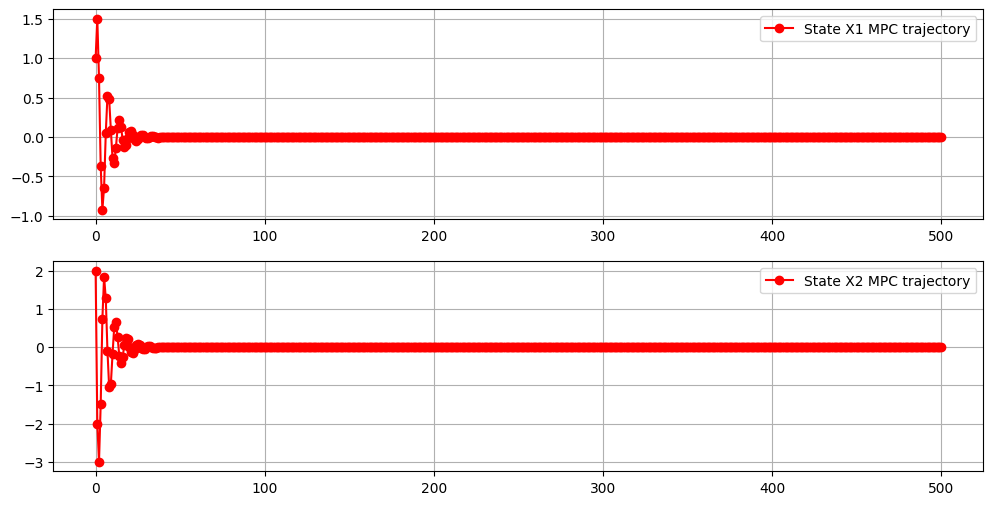

In [13]:
# Nombre de points de simulation
M = 500

# Horizon de prédiction
N = 10

X0 = np.array([[1], [2]])
X_MPC = X0

# MPC formulation
for k in range(M):
    X = cp.Variable((2, N+1))
    U = cp.Variable((1, N))
    constraints = []
    cost = 0
    constraints += [X[:,0] == X0.reshape(-1)]
    for i in range(N):
        constraints += [X[:,i+1] == A@X[:,i] + B@U[:,i],
                        X[0,i+1] <=1.5,
                        X[0,i+1] >=-1,
                        X[1,i+1] <=2,
                        X[1,i+1] >=-3,
                        U[:,i] <=2,
                        U[:,i] >=-2]

    constraints += [G @ X[:,N] <= g.reshape(-1,1)]

    for i in range(N):
        cost += cp.quad_form(X[:, i],Q) + R * cp.sum_squares(U[:, i])

    cost += cp.quad_form(X[:, N],P)


    problem = cp.Problem(cp.Minimize(cost), constraints)
    problem.solve(solver=cp.OSQP)
    print(problem.status)
    U_MPC = U.value[:,0].reshape(-1,1)

    X_new = A @ X0 + B @ U_MPC
    X_MPC = np.hstack((X_MPC, X_new.reshape(-1,1)))
    X0 = X_new


t = np.arange(M+1)
plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.plot(t, X_MPC[0,:], 'r-o', label='State X1 MPC trajectory')
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot(t, X_MPC[1,:], 'r-o', label='State X2 MPC trajectory')
plt.legend()
plt.grid()
plt.show()  